In [6]:
%load_ext autoreload
%autoreload 2
import sys


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
from scipy.stats import *
import os

import pprint
colors = sns.color_palette("muted")

In [8]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('ggplot')
colors = sns.color_palette("muted")

In [16]:
filename = "corona_nP-2000.0_init-0.002_p-0.65_quarantine-7_recovery-14_repl-78866.csv"
header =dict()

for h in filename[:-4].split("_")[1:]:
    header[h.split("-")[0]]=h.split("-")[1]
header

{'nP': '2000.0',
 'init': '0.002',
 'p': '0.65',
 'quarantine': '7',
 'recovery': '14',
 'repl': '78866'}

In [66]:
def res_reader(path = '../data/corona/remote'):
    evolutions = list()
    last_days = list()
    populations = list()
    for filename in os.listdir(path):
        if filename.startswith('corona') or filename.startswith('population'):
            df = pd.read_csv(os.path.join(path,filename), index_col = 0)
            header = dict()
            for h in filename[:-4].split("_")[1:]:
                df[h.split("-")[0]]=float(h.split("-")[1])
            if filename.startswith('corona'):                
                df.index.name = 'day'
                last_days.append(pd.DataFrame(df.iloc[-1]).T)
                df = df.reindex(range(900)).fillna(method = 'ffill') 
                df['day'] = df.index.astype(int)              
                evolutions.append(df)
                
                
            elif filename.startswith('population'):
                populations.append(df)
                
    evolutions = pd.concat(evolutions)
    for col in ['I','Q','R','S','day', 'nP' , 'repl']:
        evolutions[col] = evolutions[col].fillna(0)
        evolutions[col] = evolutions[col].astype(int)
    populations = pd.concat(populations)
    last_days = pd.concat(last_days)
    last_days['day'] = last_days.index.astype(int)   
    for col in ['I','Q','R','S','day', 'nP' , 'repl']:
        last_days[col] = last_days[col].fillna(0)
        last_days[col] = last_days[col].astype(int)
    
    return evolutions, populations, last_days

evolutions, populations, last_days = res_reader()

In [56]:
evolutions.sample(5)

,I,Q,R,S,nP,init,p,quarantine,recovery,repl,day
day,,,,,,,,,,,
396,0,4,0,3196,2000,0.001,0.850,7.000,14.000,65364,396
461,0,2,14,3184,2000,0.005,0.990,7.000,14.000,52105,461
761,0,4,72,3124,2000,0.002,0.850,7.000,14.000,35936,761
326,0,10,311,2879,2000,0.002,0.750,7.000,14.000,63634,326
814,0,4,14,3182,2000,0.001,0.900,7.000,14.000,14960,814


In [68]:
last_days

,I,Q,R,S,nP,init,p,quarantine,recovery,repl,day
156,0,14,674,2512,2000,0.002,0.650,7.000,14.000,78866,156
201,0,6,883,2311,2000,0.005,0.650,7.000,14.000,59954,201
168,0,7,145,3048,2000,0.002,0.800,7.000,14.000,24206,168
6,0,2,0,3198,2000,0.002,0.990,7.000,14.000,56281,6
150,0,5,461,2734,2000,0.010,0.850,7.000,14.000,35162,150
...,...,...,...,...,...,...,...,...,...,...,...
71,0,2,7,3191,2000,0.001,0.950,7.000,14.000,79412,71
138,0,3,45,3152,2000,0.002,0.950,7.000,14.000,67445,138
123,0,14,666,2520,2000,0.010,0.750,7.000,14.000,72535,123
36,0,2,6,3192,2000,0.001,0.950,7.000,14.000,19090,36


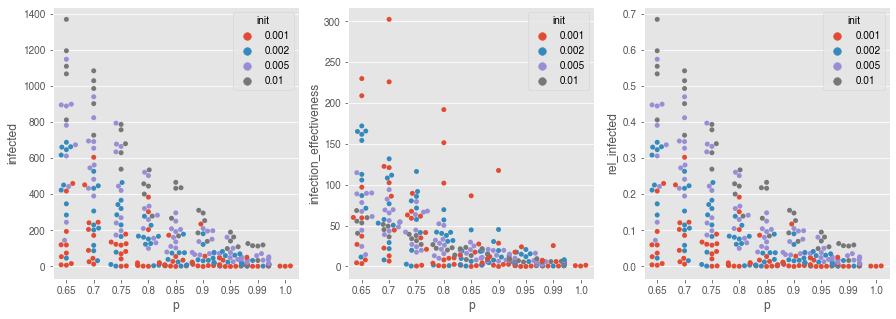

In [117]:
plt.rcParams['figure.figsize'] = [15, 5]
last_days['infection_effectiveness'] = (3200 - last_days.S) / (2000* last_days['init'])
last_days['infected'] = 3200- last_days.S
last_days['rel_infected'] = (3200 - last_days.S)  / 2000

fig, axes = plt.subplots(1,3)
axes = axes.flatten()
sns.swarmplot(x = 'p', y = 'infected', hue = 'init', ax = axes[0], data = last_days)
sns.swarmplot(x = 'p', y = 'infection_effectiveness', hue = 'init', ax = axes[1], data = last_days)
sns.swarmplot(x = 'p', y = 'rel_infected', hue = 'init', ax = axes[2], data = last_days)

In [120]:
20/32

0.625

In [127]:
df = pd.read_csv('paxes.csv')
df[df.active_today==True].shape

(2000, 11)

In [104]:
last_days

,I,Q,R,S,nP,init,p,quarantine,recovery,repl,day,share
156,0,14,674,2512,2000,0.002,0.650,7.000,14.000,78866,156,0.215
201,0,6,883,2311,2000,0.005,0.650,7.000,14.000,59954,201,0.278
168,0,7,145,3048,2000,0.002,0.800,7.000,14.000,24206,168,0.048
6,0,2,0,3198,2000,0.002,0.990,7.000,14.000,56281,6,0.001
150,0,5,461,2734,2000,0.010,0.850,7.000,14.000,35162,150,0.146
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,2,7,3191,2000,0.001,0.950,7.000,14.000,79412,71,0.003
138,0,3,45,3152,2000,0.002,0.950,7.000,14.000,67445,138,0.015
123,0,14,666,2520,2000,0.010,0.750,7.000,14.000,72535,123,0.212
36,0,2,6,3192,2000,0.001,0.950,7.000,14.000,19090,36,0.003


In [84]:
list(evolutions['p'].unique())

[0.65, 0.8, 0.99, 0.85, 0.7, 0.75, 0.9, 0.95, 1.0]

0.65 0.001
0.65 0.002
0.65 0.005
0.65 0.01
0.7 0.001
0.7 0.002
0.7 0.005
0.7 0.01
0.75 0.001
0.75 0.002
0.75 0.005
0.75 0.01
0.8 0.001
0.8 0.002
0.8 0.005
0.8 0.01
0.85 0.001
0.85 0.002
0.85 0.005
0.85 0.01
0.9 0.001
0.9 0.002
0.9 0.005
0.9 0.01
0.95 0.001
0.95 0.002
0.95 0.005
0.95 0.01


IndexError: index 28 is out of bounds for axis 0 with size 28

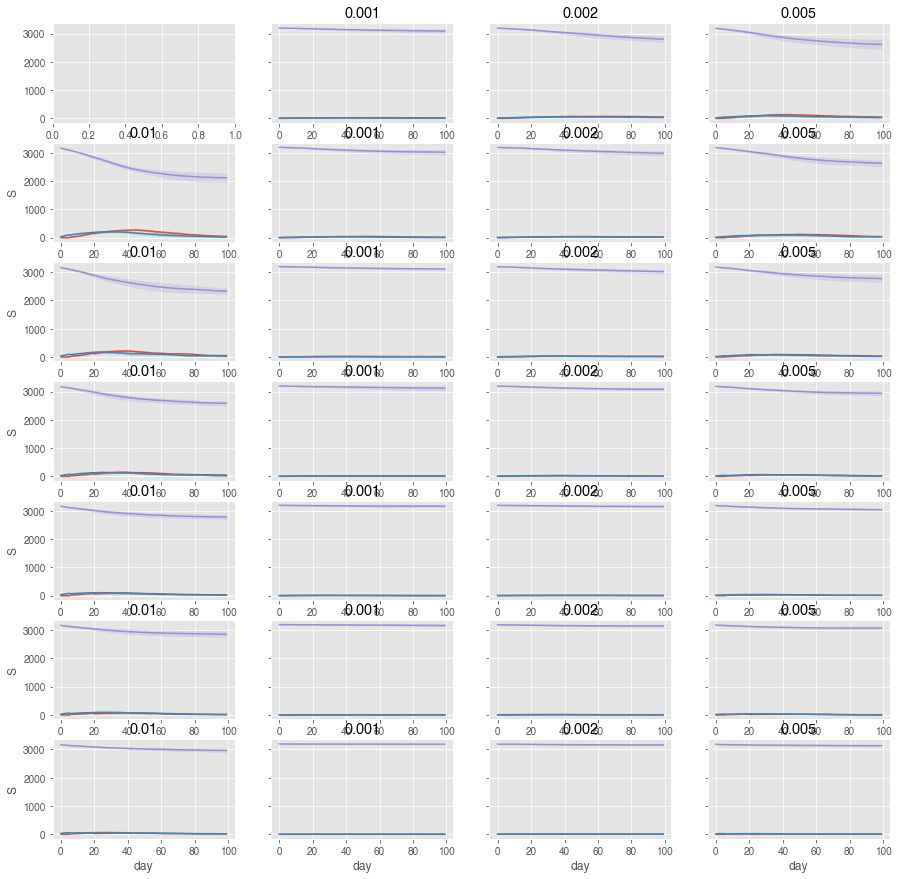

In [87]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axes = plt.subplots(7,4, sharey =True)
axes = axes.flatten()
evolutions = evolutions[evolutions.day<100]
i = -1
for p in [0.65, 0.7, 0.75,  0.8,  0.85, 0.9, 0.95]:
    for share in [0.001,0.002,0.005,0.01]:
        i+=1
        print(p, share)
        df = evolutions[(evolutions.init == share) & (evolutions.p == p)]
        sns.lineplot(x = 'day', y = 'Q', data = df, ax = axes[i], label = 'Q' if i == 0 else None)
        sns.lineplot(x = 'day', y = 'I', data = df, ax = axes[i], label = "I" if i == 0 else None)
        sns.lineplot(x = 'day', y = 'S', data = df, ax = axes[i], label = "S" if i == 0 else None)
        axes[i].set_title(share)
    
#axes[-1].set_title(0.2)
#sns.lineplot(x = 'day', y = 'Q', data = nowe, ax = axes[-1], label = 'Q' if i == 0 else None)
#sns.lineplot(x = 'day', y = 'I', data = nowe, ax = axes[-1], label = "I" if i == 0 else None)
fig.tight_layout()

In [5]:
df = pd.read_csv("../data/corona/population_nP-160.0_init-0.025_p-0.8_quarantine-6_recovery-7_repl-51263.csv")

FileNotFoundError: [Errno 2] File ../data/corona/population_nP-160.0_init-0.025_p-0.8_quarantine-6_recovery-7_repl-51263.csv does not exist: '../data/corona/population_nP-160.0_init-0.025_p-0.8_quarantine-6_recovery-7_repl-51263.csv'

In [36]:
df.sort_values('infection_day')

,Unnamed: 0,Unnamed: 0.1,pos,status,platforms,active,state,quarantine_day,active_today,infection_day,infected_by,newly_quarantined
102,102,103,1449050800,0,[0],True,R,5.000,True,-1.000,nan,False
138,138,139,1608998348,0,[0],True,R,5.000,True,-1.000,nan,False
198,198,199,44844498,0,[0],True,R,8.000,True,2.000,189.000,False
191,191,192,44869806,0,[0],True,R,9.000,True,3.000,189.000,False
199,199,200,44738668,0,[-1],True,R,9.000,False,3.000,198.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
184,184,185,1830058797,0,[0],True,S,nan,True,nan,nan,False
185,185,186,44808574,0,[0],True,S,nan,True,nan,nan,False
190,190,191,618269390,0,[-1],True,S,nan,False,nan,nan,False
195,195,196,5246048596,0,[0],True,S,nan,True,nan,nan,False


In [1]:
def plot_heat_infection(population_file = "../data/corona/population_nP-800.0_init-0.1_p-0.8_quarantine-7_recovery-14_repl-44063.csv", days = 100):
    def for_plot(row):    
        
        if pd.isna(row.infection_day):
            return [0]*days
        else:
            record = list()
            record+=[0]*int(max(0,row.infection_day))
            record+=[1]*int(row.quarantine_day-row.infection_day)
            record+=[2]*14 
            record+=[3]*(days-len(record))
            return record
    df = pd.read_csv(population_file)
    

    df = df.sort_values('infection_day')
    d = df.apply(lambda x: for_plot(x),axis = 1)
    df2 = pd.DataFrame.from_records(d).T
    cmap = ['wheat','orangered','navy','darkgreen']
    #cmap = sns.color_palette("deep", 4)
    fig, ax = plt.subplots()

    sns.heatmap(df2, cmap = cmap, alpha = 1, ax = ax)
    colorbar = ax.collections[0].colorbar 
    colorbar.set_ticks([0.5,3/4+0.5,0.5+2*3/4,0.5+3*3/4])
    colorbar.set_ticklabels(['S','I','Q','R'])
    ax.set_ylabel('time (days)')
    ax.set_xlabel('passenger')
plot_heat_infection()

NameError: name 'pd' is not defined

---
### read files

In [88]:
import os
ret = list()
for f in os.listdir('res'):
    if f.startswith('spread') and 'init_' in f:
        f.split("_")
        df = pd.read_csv(os.path.join('res',f))
        del df['Unnamed: 0']
        df.index.name = 'day'

        df['initial_share'] = float(f.split("_")[3])
        df['replication'] = f.split("_")[5][:-4]
        df = df.reindex(range(38)).fillna(method = 'ffill') 
        df['day'] = df.index.astype(int)
        ret.append(df)
    if f.startswith('spread') and 'init_' not in f:
        f.split("_")
        df = pd.read_csv(os.path.join('res',f))
        del df['Unnamed: 0']
        df.index.name = 'day'
        
        df['initial_share'] = float(f.split("_")[2][4:])
        df['replication'] = f.split("_")[3]
        df = df.reindex(range(38)).fillna(method = 'ffill') 
        df['day'] = df.index.astype(int)
        ret.append(df)
        

spreads = pd.concat(ret)

In [82]:
import os
ret = list()
for f in os.listdir('res'):
    if f.startswith('pop') and 'init_' in f:
        f.split("_")
        df = pd.read_csv(os.path.join('res',f))
        del df['Unnamed: 0']
        df.index.name = 'day'
        
        df['initial_share'] = (f.split("_")[3])
        df['replication'] = f.split("_")[5][:-4]
        df['id'] = df.index
        ret.append(df[['state','infection_day','initial_share','replication', 'id', 'infected_by']])

population = pd.concat(ret)

#### findings 1. single infectors

distribution of number of infected

In [304]:
to_concat = list()
for repl in population.replication.unique():
    inData.population = population[population.replication == repl]
    inf_map = infection_map(inData)
    inf_map = pd.DataFrame(inf_map).T
    lens, rets, degs = dict(), dict(), dict()
    for i, infector in inf_map.iterrows():
        j = 1
        ret = infector[1].copy()
        while len(infector[j]) > 0:
            j += 1
            ret += infector[j]
        rets[i] = ret
        lens[i] = len(ret)
        degs[i] = j
    inf_map['all_infected'] = pd.Series(rets)
    inf_map['n_infected'] = pd.Series(lens)
    inf_map['degree'] = pd.Series(degs)
    to_concat.append(inf_map)

In [357]:
df.degree.describe()

count   4323.000
mean       2.045
std        1.469
min        1.000
25%        1.000
50%        2.000
75%        2.000
max       14.000
Name: degree, dtype: float64

In [314]:
df = pd.concat(to_concat, axis = 0)

/Users/rkucharski/anaconda3/envs/MaaSSim/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


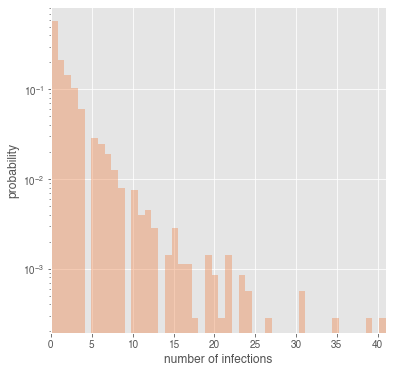

In [376]:
plt.rcParams['figure.figsize'] = [6, 6]
fig, ax = plt.subplots()
sns.distplot(df.n_infected, kde = False, norm_hist = True, ax = ax, color = colors[1])
ax.set_xlim([0,41])
ax.set_yscale('log')
ax.set_ylabel('probability')
_ = ax.set_xlabel('number of infections')

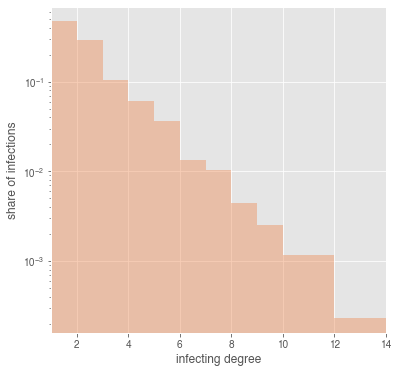

In [386]:
fig, ax = plt.subplots()
sns.distplot(df.degree.astype(int), kde = False, norm_hist = True, ax = ax, bins=np.arange(0,16), color = colors[1])
ax.set_xlim([1,14])
ax.set_yscale('log')
ax.set_ylabel('share of infections')
_ = ax.set_xlabel('infecting degree')

NameError: name 'population' is not defined

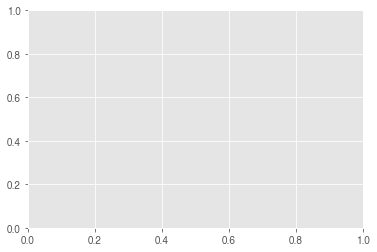

In [69]:
fig, ax = plt.subplots()
for i, share in enumerate([0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    df = population[population['initial_share']==share].pivot(index = 'id',columns = 'replication', values = 'infection_day').T
    sns.distplot(df.count()/10, ax = ax, label = share, rug = False, kde = False)
ax.legend()

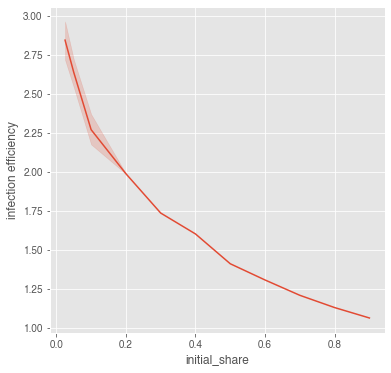

In [115]:
plt.rcParams['figure.figsize'] = [6, 6]
last_days = spreads[spreads.day == 37]
last_days.Q = last_days.Q.astype(float)
last_days['infected'] = last_days.Q/3000
last_days['infection efficiency'] = last_days['infected']/last_days['initial_share'].astype(float)

last_days.initial_share = last_days.initial_share.astype(float)
fig, ax = plt.subplots()
sns.lineplot(y = 'infection efficiency', x = 'initial_share', 
             data = last_days[(last_days['initial_share']>0.02) & (last_days['infection efficiency']>0.02)], ax = ax)
#ax.set_ylim([0,1])
#ax.set_xlim([0,1])
plt.savefig('curve.png')

In [70]:
sns.lineplot(last_days)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

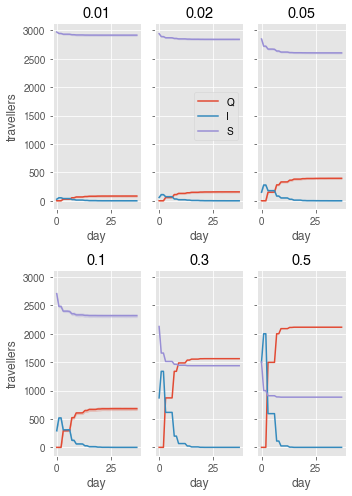

In [105]:
plt.rcParams['figure.figsize'] = [5, 7]
fig, axes = plt.subplots(2,3, sharey =True)
axes = axes.flatten()
for i, share in enumerate([0.01, 0.02, 0.05, 0.1, 0.3, 0.5]):
    df = spreads[spreads.initial_share == share]

    sns.lineplot(x = 'day', y = 'Q', data = df, ax = axes[i], label = 'Q' if i == 1 else None)
    sns.lineplot(x = 'day', y = 'I', data = df, ax = axes[i], label = "I" if i == 1 else None)
    sns.lineplot(x = 'day', y = 'S', data = df, ax = axes[i], label = "S" if i == 1 else None)
    axes[i].set_title(share)
    axes[i].set_ylabel('travellers')

fig.tight_layout()
plt.savefig('spreads.png')

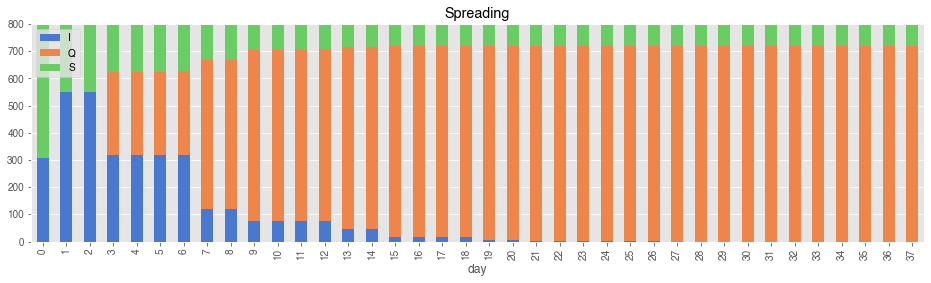

In [446]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('ggplot')
colors = sns.color_palette("muted")

fig, axes = plt.subplots()
df = spreads[(spreads.initial_share == 0.1) & (spreads.replication == "repl1584413335.790449.csv")]
df[['I','Q','S']].plot(kind='bar', stacked=True, color = colors[:6], ax=axes)
axes.set_ylim([0, 800])


axes.set_title('Spreading')
axes.set_xlabel('day')
plt.show()

---
params

In [13]:
params = get_config('corona.json')  # configuration, including shareability parameters (to reproduce utility)

In [14]:
inData = load_G(inData, params, stats=True)

In [53]:
inData.population = population
inData.population = inData.population.drop(2505)
inData.population.infection_day = inData.population.infection_day.astype(float) 

In [27]:
inData.requests = pd.read_csv('requests_big.csv')
rides = pd.read_csv('rides_big.csv')
schedule = pd.read_csv('schedule_big.csv')

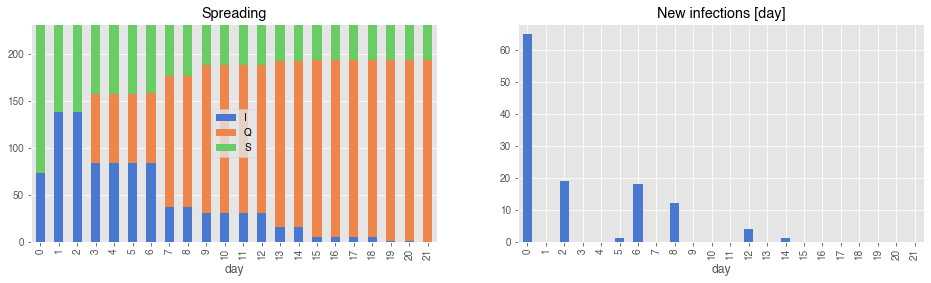

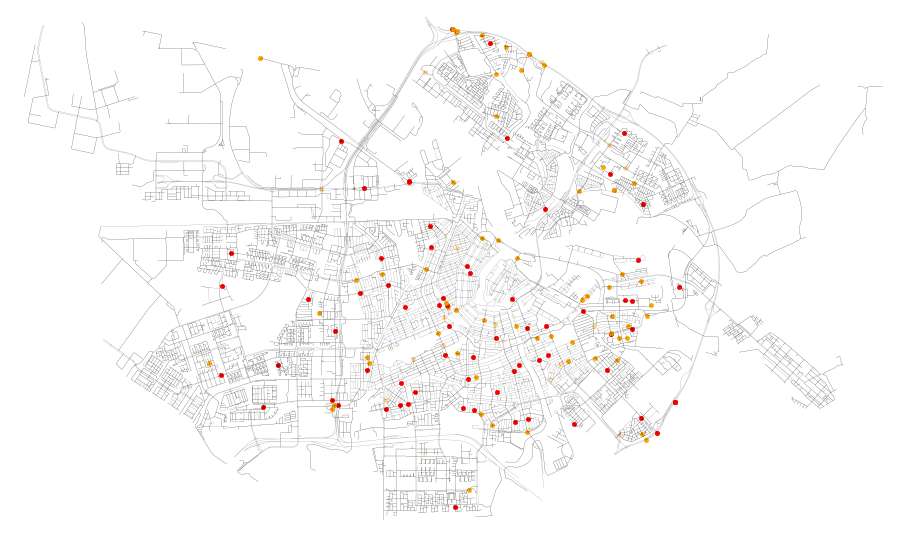

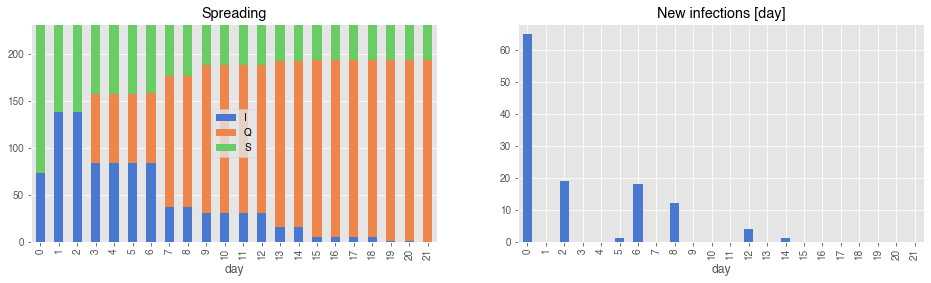

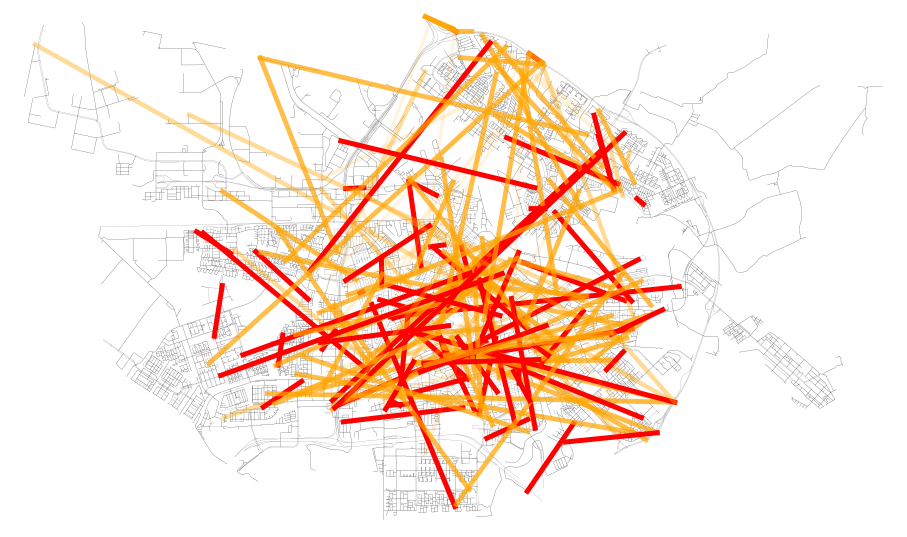

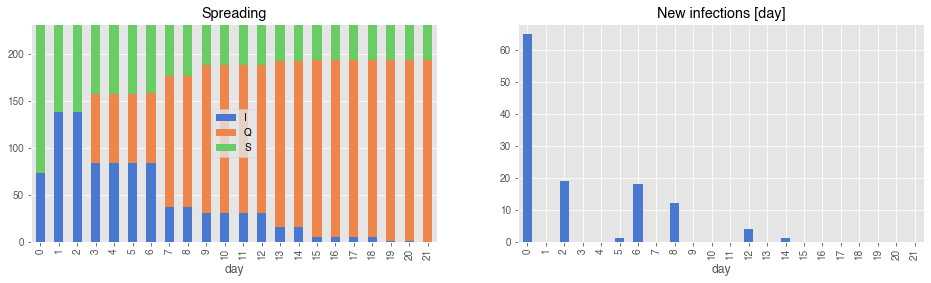

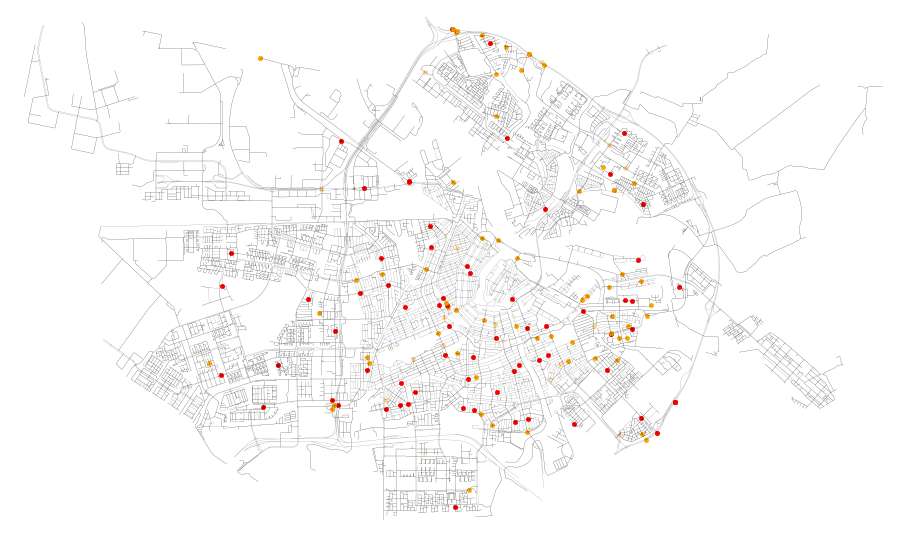

In [63]:
inData.all_requests = inData.requests
inData.report = spread.T
plot_spread(inData, MODE = 'o')
plot_spread(inData, MODE = 'paths')
plot_spread(inData, MODE = 'd')